In [1]:
#Importamos librerías
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from urllib.request import urlopen
from mplsoccer import Sbopen, Pitch, FontManager, VerticalPitch, add_image
from PIL import Image
from statsbombpy import sb

In [2]:
#Listamos competiciones de Statsbomb
competiciones = sb.competitions()
competiciones

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [3]:
#Partidos de la competicion seleccionada usando los ID's de competicion y temporada
#Eurocopa 2024: competition_id (55) y season_id (282)
#Copa America 2024: competition id (223) y season id (282)
comp = sb.matches(competition_id=223, season_id=282)
#Muestra todos los partidos de la competencia
comp

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3943077,2024-07-15,04:15:00.000,South America - Copa America,2024,Argentina,Colombia,1,0,available,...,None,6,Final,Hard Rock Stadium,Raphael Claus,Lionel Sebastián Scaloni,Néstor Gabriel Lorenzo,1.1.0,2,2
1,3943076,2024-07-14,03:00:00.000,South America - Copa America,2024,Canada,Uruguay,2,2,available,...,None,6,3rd Place Final,Bank of America Stadium,Alexis Herrera,Jesse Marsch,Marcelo Alberto Bielsa Caldera,1.1.0,2,2
2,3942852,2024-07-11,03:00:00.000,South America - Copa America,2024,Uruguay,Colombia,0,1,available,...,None,5,Semi-finals,Bank of America Stadium,César Arturo Ramos Palazuelos,Marcelo Alberto Bielsa Caldera,Néstor Gabriel Lorenzo,1.1.0,2,2
3,3942785,2024-07-10,03:00:00.000,South America - Copa America,2024,Argentina,Canada,2,0,available,...,None,5,Semi-finals,MetLife Stadium,Piero Maza Gomez,Lionel Sebastián Scaloni,Jesse Marsch,1.1.0,2,2
4,3942416,2024-07-07,01:00:00.000,South America - Copa America,2024,Colombia,Panama,5,0,available,...,None,4,Quarter-finals,State Farm Stadium,Maurizio Mariani,Néstor Gabriel Lorenzo,Thomas Christiansen Tarín,1.1.0,2,2
5,3942415,2024-07-07,04:00:00.000,South America - Copa America,2024,Uruguay,Brazil,0,0,available,...,None,4,Quarter-finals,Allegiant Stadium,Darío Herrera,Marcelo Alberto Bielsa Caldera,Dorival Silvestre Júnior,1.1.0,2,2
6,3939986,2024-06-30,03:00:00.000,South America - Copa America,2024,Argentina,Peru,2,0,available,...,None,3,Group Stage,Hard Rock Stadium,César Arturo Ramos Palazuelos,Lionel Sebastián Scaloni,Jorge Daniel Fossati Lurachi,1.1.0,2,2
7,3939973,2024-06-24,04:00:00.000,South America - Copa America,2024,Uruguay,Panama,3,1,available,...,None,1,Group Stage,Hard Rock Stadium,Piero Maza Gomez,Marcelo Alberto Bielsa Caldera,Thomas Christiansen Tarín,1.1.0,2,2
8,3942229,2024-07-06,04:00:00.000,South America - Copa America,2024,Venezuela,Canada,1,1,available,...,None,4,Quarter-finals,AT&T Stadium,Wilton Pereira Sampaio,Fernando Ariel Batista,Jesse Marsch,1.1.0,2,2
9,3942228,2024-07-05,04:00:00.000,South America - Copa America,2024,Argentina,Ecuador,1,1,available,...,None,4,Quarter-finals,NRG Stadium,Andrés Matonte,Lionel Sebastián Scaloni,Félix Sánchez Bas,1.1.0,2,2


In [4]:
#Filtra los partidos de una selección específica
equipo = "Ecuador"
partidos = comp.loc[(comp['home_team'] == f'{equipo}')|(comp['away_team'] == f'{equipo}')]
partidos

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
9,3942228,2024-07-05,04:00:00.000,South America - Copa America,2024,Argentina,Ecuador,1,1,available,...,None,4,Quarter-finals,NRG Stadium,Andrés Matonte,Lionel Sebastián Scaloni,Félix Sánchez Bas,1.1.0,2,2
17,3939988,2024-07-01,03:00:00.000,South America - Copa America,2024,Mexico,Ecuador,0,0,available,...,None,3,Group Stage,State Farm Stadium,Mario Alberto Escobar Toca,Jaime Arturo Lozano Espín,Félix Sánchez Bas,1.1.0,2,2
21,3939980,2024-06-27,01:00:00.000,South America - Copa America,2024,Ecuador,Jamaica,3,1,available,...,None,2,Group Stage,Allegiant Stadium,Cristián Garay,Félix Sánchez Bas,Heimir Hallgrímsson,1.1.0,2,2
28,3939972,2024-06-23,01:00:00.000,South America - Copa America,2024,Ecuador,Venezuela,1,2,available,...,None,1,Group Stage,Levi''s Stadium,Wilmar Alexander Roldán Pérez,Félix Sánchez Bas,Fernando Ariel Batista,1.1.0,2,2


In [5]:
#Seleccionamos el partido con el código de match_id
parser = Sbopen()
df, related, freeze, tactics = parser.event(3942228)

In [6]:
# Filtrar las columnas relevantes para los jugadores
players_df = df[['player_id', 'player_name']]

# Eliminar duplicados
players_df = players_df.drop_duplicates()

# Mostrar la lista de jugadores del partido
print("Lista de jugadores:")
print(players_df)

Lista de jugadores:
      player_id                      player_name
0           NaN                              NaN
4       11456.0          Lautaro Javier Martínez
5       27886.0              Alexis Mac Allister
8        7797.0           Rodrigo Javier De Paul
10      37726.0      Moisés Isaac Caicedo Corozo
12      20572.0          Cristian Gabriel Romero
15      27768.0                Lisandro Martínez
24       5507.0     Nicolás Alejandro Tagliafico
33      29201.0             Nahuel Molina Lucero
39       6909.0         Damián Emiliano Martínez
44      28559.0   Enner Remberto Valencia Lastra
48      40211.0  Jeremy Leonel Sarmiento Morante
61       5503.0   Lionel Andrés Messi Cuccittini
64      38718.0                   Enzo Fernandez
73      20687.0            Nicolás Iván González
77     384888.0          Ray Kendry Páez Andrade
81      37737.0    Angelo Smit Preciado Quiñónez
98      37945.0         Alan Steven Franco Palma
128     41593.0       Willian Joel Pacho Tenorio


In [7]:
#Ingresamos el nombre del jugador que deseamos generar el gráfico
df = df[(df.player_name == 'Moisés Isaac Caicedo Corozo') & (df.type_name == 'Pass')].copy()

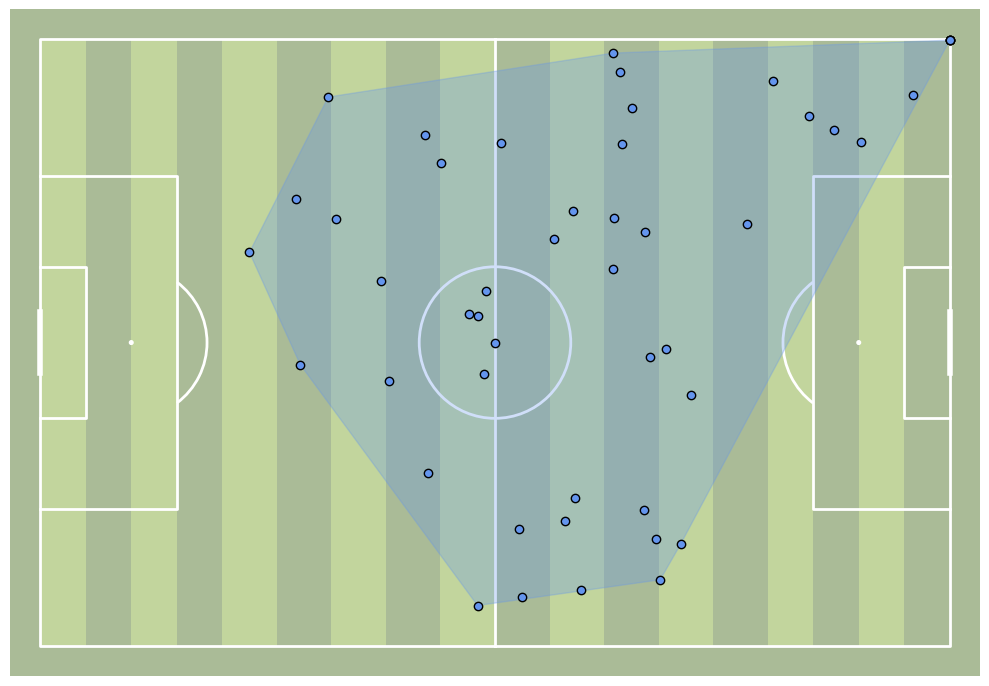

In [8]:
#Generamos el gráfico en el campo de juego
pitch = Pitch(pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True)  # optional stripes

fig, ax = pitch.draw(figsize=(10, 7.5))
hull = pitch.convexhull(df.x, df.y)
poly = pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)
scatter = pitch.scatter(df.x, df.y, ax=ax, edgecolor='black', facecolor='cornflowerblue')
plt.show()  # if you are not using a Jupyter notebook this is necessary to show the plot